In [ ]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf    #for getting r-square  values
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


**Load and explore the dataset**

In [ ]:
data=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


**Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data.shape   # dataset have the 1436 rows and the 11 column

(1436, 11)

In [ ]:
data.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
# check the datatypes of the each column
data.dtypes

#fuel_type column it is the categorical-object datatype and remaining all columns are the numerica datatypes-int

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


**Visualize the data**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

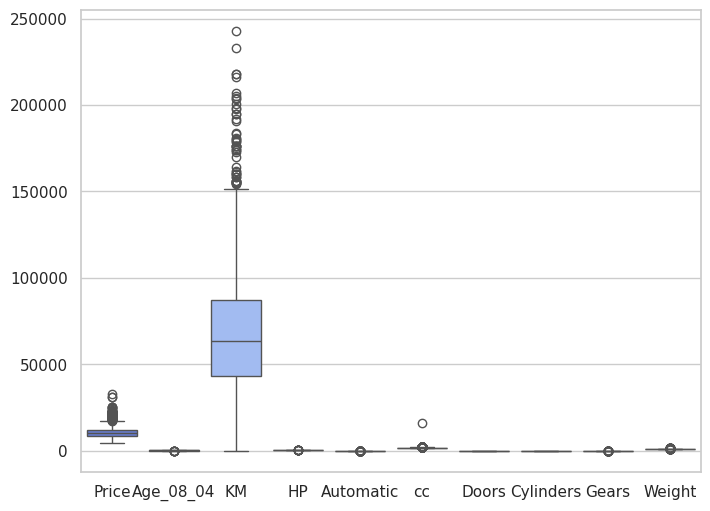

In [ ]:
#Visualize the distribution of individual numerical features using  boxplots:identify the outliers
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(8,6)

sns.boxplot(data=data,palette='coolwarm')

**Find the relation between numerical variables**

In [ ]:
# find out the relation between the numerical  variables use the correlation matrix
#For categorical-numerical correlations:use the  ANOVA F-test, point-biserial correlation, or encode the categorical variables and compute Pearson correlation.


#drop the categorical columns-Fuel_Type these is the categorical column
data.drop(columns=['Fuel_Type'],inplace=True)
#to get the proper correlation  matrix drop the cylinder column
data.drop(columns=['Cylinders'],inplace=True)



In [ ]:
correlation_matrix=data.corr()
correlation_matrix



,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


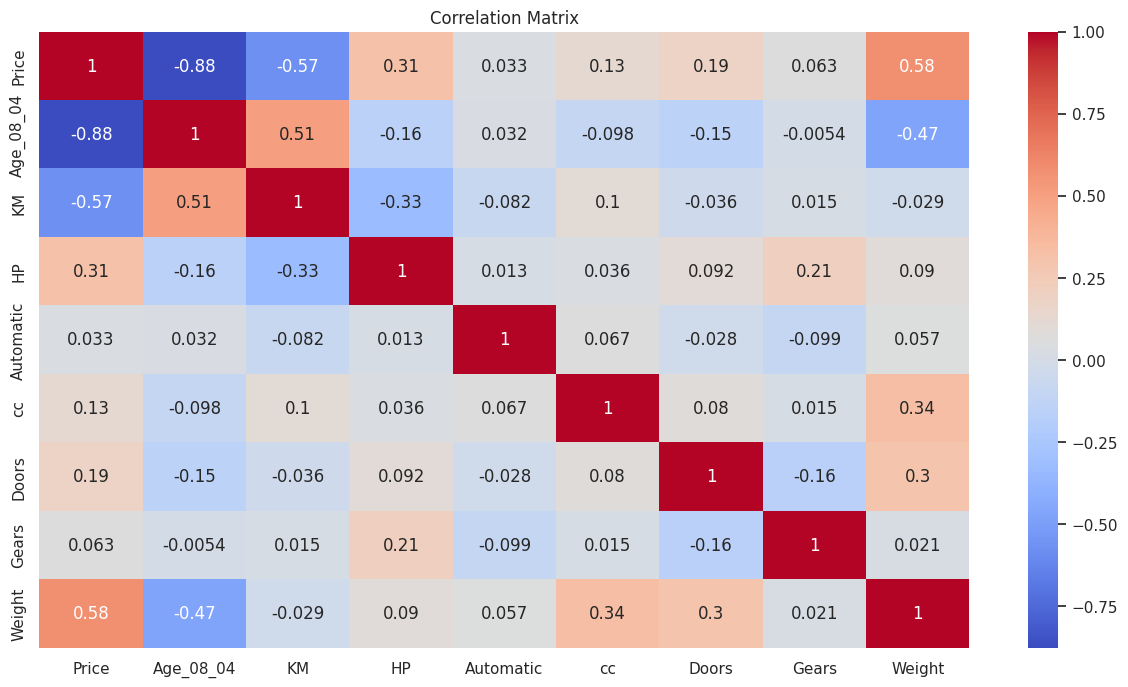

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [ ]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025
1432,10845,72,19000,86,0,1300,3,5,1015
1433,8500,71,17016,86,0,1300,3,5,1015
1434,7250,70,16916,86,0,1300,3,5,1015


In [ ]:
x=data.iloc[:,1:9]
y=data['Price']


In [ ]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


In [ ]:
x.shape

(1436, 8)

In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
y.shape

(1436,)

In [ ]:
#create the instance of the standardscaler
SC=StandardScaler()

In [ ]:
#transform the data by using fit_transform method
X= SC.fit_transform(data)
X

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -1.08513865,
        -0.14042519,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -1.08513865,
        -0.14042519,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -1.08513865,
        -0.14042519,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -1.08513865,
        -0.14042519, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -1.08513865,
        -0.14042519, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ...,  1.014941  ,
        -0.14042519,  0.78939926]])

In [ ]:
#separate the categorical columns
categorical_columns = data.select_dtypes(include=['float64','category']).columns
categorical_columns

Index([], dtype='object')

In [ ]:
X_encoded = pd.get_dummies(x, drop_first=True)
X_encoded

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


In [ ]:
if X_encoded.isnull().any().any():
    print("\nWarning: NaN values detected after conversion, indicating hidden strings were present.")

print(X_encoded.isnull().sum())  # Show where NaNs were introduced

Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64


In [ ]:
# Drop rows with NaN values if needed (result of coercion)
X_encoded = X_encoded.dropna()
X_encoded

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


**Build a multiple linear regression model using the training dataset**

**Interpret the coefficients of the model. Build minimum of 3 different models.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: xtrain, xtest, ytrain and ytest
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)


In [ ]:
x_train, x_test,y_train,y_test

(      Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight
 609          67  174833   72          0  2000      4      5    1100
 511          51   53408  110          0  1600      5      5    1080
 878          60   61977   86          0  1300      3      5    1015
 960          66   50806   86          0  1300      3      5    1480
 303          39   39524   97          0  1398      3      5    1025
 ...         ...     ...  ...        ...   ...    ...    ...     ...
 763          67   79762   86          0  1300      3      5    1015
 835          67   67762  110          0  1600      3      6    1065
 1216         70   85864   72          0  2000      5      5    1135
 559          50   39706  110          0  1600      5      5    1080
 684          68  101001  110          0  1600      5      5    1075
 
 [1148 rows x 8 columns],
       Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight
 651          68  115071  110          0  1600      3      5    1055
 411  

In [ ]:
#training sample
x_train.shape,y_train.shape

((1148, 8), (1148,))

In [ ]:
#testing sample
x_test.shape,y_test.shape

((288, 8), (288,))

**Model 1: Standard Multiple Linear Regression**

In [ ]:
linear_regression=LinearRegression()

In [ ]:
#fit the data by using the trainning data
linear_regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predict the data by using testing data
y_prediction=linear_regression.predict(x_test)

In [ ]:
y_prediction

array([ 8239.70760133, 10483.548543  , 12945.23899384,  7677.33704285,
       10528.62592372,  9546.06733264,  6051.23602653, 16213.21259676,
       11285.5202679 , 10518.17214072,  6876.15321619, 11263.53922577,
       11781.53725442,  9770.71065955,  7489.89937822, 16110.52394123,
       11159.40607714,  7646.8206831 , 12888.92165354,  8896.31696865,
        6662.41693021,  6050.71201816, 11634.89650571, 12189.82130912,
       19099.42358948,  7750.01972506, 14009.92063071,  5633.21141691,
        9239.25222499,  7806.99113516, 10494.82875737,  7564.07466593,
       15789.82425317,  7285.60061014, 10917.44300162, 12983.40021772,
        9621.37750713, 12287.28799099, 10001.31591617,  8907.55890609,
        8725.80267529, 10593.53817804,  9995.52898182, 17288.67332551,
       10914.2667211 ,  6966.63777033,  9619.87708361,  7718.49520597,
        8308.69256618,  8718.92450015, 19389.38061242,  8434.227147  ,
        7181.26353436,  6447.34990112, 11418.98445042, 18257.79863875,
      

In [ ]:
linear_regression.score(x_train,y_train),linear_regression.score(x_test,y_test) # Train accuracy, Test accuracy

# overfitted model as high train accuracy and low test accuracy


(0.8716900831302584, 0.741311527521537)

In [ ]:
# Evaluate the model
MSE = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {r2}")

Mean Squared Error: 3218676.8115172335
R-squared: 0.741311527521537


**Apply Lasso and Ridge methods on the model.**

**Model 2: Lasso(L1) Regression**

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# after lasso, train accuracy will decrease but test accuracy will increase
l1 = Lasso() # alpha = 0.1 by default
l1.fit(x_train,y_train)
y_prediction_lasso=l1.predict(x_test)
l1.score(x_train,y_train),l1.score(x_test,y_test)
# we got same accuracy and overfitted model

(0.871685904489079, 0.7405107877794876)

In [ ]:
print(f"Lasso R-squared: {r2_score(y_test, y_prediction_lasso)}")

Lasso R-squared: 0.7405107877794876


**Model 3:Ridge (L2) Regression**

In [ ]:
l2 = Ridge()
l2.fit(x_train,y_train)
y_prediction_ridge=l2.predict(x_test)
l2.score(x_train,y_train),l1.score(x_test,y_test)

(0.8716891524136156, 0.7405107877794876)

In [ ]:
print(f"Ridge R-squared: {r2_score(y_test, y_prediction_ridge)}")

Ridge R-squared: 0.7410485866454026


**Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

In [ ]:
MSE_1, r2_1 = mean_squared_error(y_test, y_prediction), r2_score(y_test,  y_prediction)
MSE_2, r2_2 = mean_squared_error(y_test, y_prediction_lasso), r2_score(y_test, y_prediction_lasso)
MSE_3, r2_3 = mean_squared_error(y_test, y_prediction_ridge), r2_score(y_test,y_prediction_ridge)

# Display model performance
print(f"Model 1 - Standard MLR: MSE = {MSE_1:.2f}, R-squared = {r2_1:.2f}")
print(f"Model 2 - Lasso Regression: MSE = {MSE_2:.2f}, R-squared = {r2_2:.2f}")
print(f"Model 3 - Ridge Regression: MSE = {MSE_3:.2f}, R-squared = {r2_3:.2f}")

Model 1 - Standard MLR: MSE = 3218676.81, R-squared = 0.74
Model 2 - Lasso Regression: MSE = 3228639.85, R-squared = 0.74
Model 3 - Ridge Regression: MSE = 3221948.40, R-squared = 0.74


**Interview Questions:**

**1.What is Normalization & Standardization and how is it helpful?**

**Normalization** is the process of scaling data to a specific range, typically between 0 and 1.
**Standardization** transforms data to have a mean of 0 and a standard deviation of 1.
Both techniques improve model performance by reducing bias due to differing feature scales and speeding up convergence during training.



**2.What techniques can be used to address multicollinearity in multiple linear regression?**

**Variance Inflation Factor(VIF)**these method is used to identify multicollinearity problem.Use **Partial Least Squares Regression (PLS)** or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.